In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df1=pd.read_csv("mobileusebasedata.csv")
df1.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
df2=pd.read_csv('most_used_screens.csv')
df2.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [4]:
df1.shape,df2.shape

((50000, 12), (58, 2))

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
# since there are more null value in the enrolled_date so it is better to drop enrolled_date beacuse 
#it doesnot more impact the enrollment or not 

In [7]:
df1.drop(["first_open","enrolled_date"],axis=1,inplace=True)

In [8]:
df1.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [9]:
df1['hour']=df1['hour'].str.strip()

In [10]:
df1['hour'] = pd.to_datetime(df1['hour'], format='%H:%M:%S').dt.hour

In [11]:
df1[df1.duplicated()]

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
9126,44123,1,18,46,"Cycle,Loan2,Loan1,Rewardjoinscreen,RewardsCont...",18,0,1,0,0
10230,266497,5,19,29,"Splash,Cycle,Home,Loan2,Loan1,History,RewardsC...",10,0,1,0,0
15023,268376,4,5,25,"joinscreen,product_review,product_review2,Scan...",10,0,0,0,0
15482,258836,0,14,25,"idscreen,Splash,Home,product_review,product_re...",57,1,1,1,0
19207,116730,3,16,28,"idscreen,Home,Loan3,Loan1,WebView,Finances,Cre...",26,0,0,0,0
20576,160267,3,0,29,"idscreen,Home,SelectInstitution,BankVerificati...",38,0,0,1,0
21925,218403,5,11,33,"idscreen,Cycle,location,VerifyDateOfBirth,Veri...",24,1,0,1,0
26695,210209,2,0,49,"Home,product_review,product_review,product_rev...",16,0,1,0,0
27815,111620,4,15,26,"product_review,RewardDetail,RewardsContainer",3,0,0,1,0
29823,18967,6,15,27,"Splash,idscreen,Cycle,product_review,product_r...",15,0,0,1,0


In [12]:
df1.drop_duplicates(inplace=True)


In [13]:
df1.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [14]:
# seeing that data is balance or not 
df1["enrolled"].value_counts()
 

1    31067
0    18918
Name: enrolled, dtype: int64

In [15]:
#  as we can see that data is balance 

In [16]:
df1.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,186903.048995,3.029689,12.557387,31.723777,21.096349,0.107812,0.171992,0.621526,0.165050
std,107771.058591,2.032024,7.438224,10.803720,15.728734,0.310146,0.377377,0.485011,0.371229
min,13.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93528.000000,1.000000,5.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187210.000000,3.000000,14.000000,29.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,280000.000000,5.000000,19.000000,37.000000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.000000,325.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df1.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


<AxesSubplot:xlabel='enrolled', ylabel='count'>

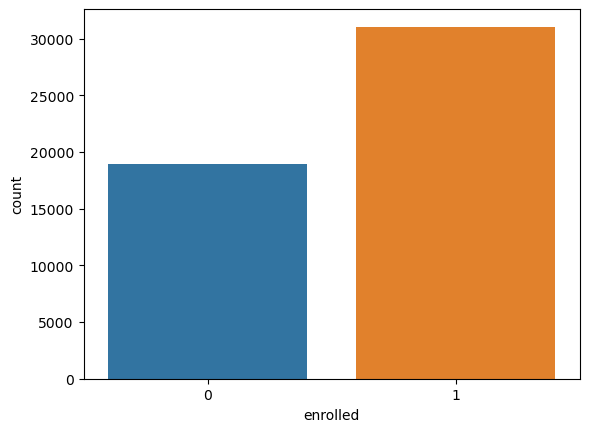

In [18]:
sns.countplot(data=df1,x="enrolled")

In [19]:
# new dataframe for those people who enrolled into the programm and those do not enrolled int the programm
df_new1=df1[df1["enrolled"]==1]
df_new0=df1[df1["enrolled"]==0]

In [20]:
df_new1.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


In [21]:
df_new0.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
6,144649,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,0
7,249366,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,0


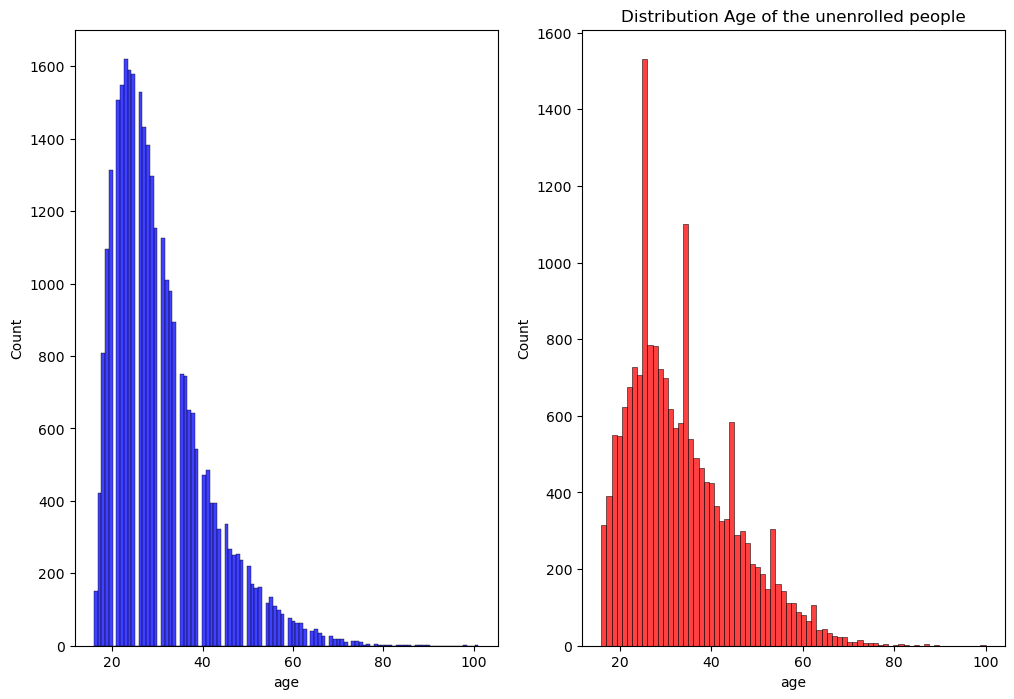

In [22]:
fig,axs=plt.subplots(1,2,figsize=(12,8))
sns.histplot(df_new1["age"],color="blue",label="enrolled",ax=axs[0])
plt.title(" distribution Age of the enrolled people")


sns.histplot(df_new0["age"],color="red",label="unenrolled",ax=axs[1])
plt.title("Distribution Age of the unenrolled people")
plt.show()

as we see as the age increase enrolled for the programm is reduced
the people who are the age of 20-40 more more enrolled as compare to other 

<AxesSubplot:xlabel='hour', ylabel='Count'>

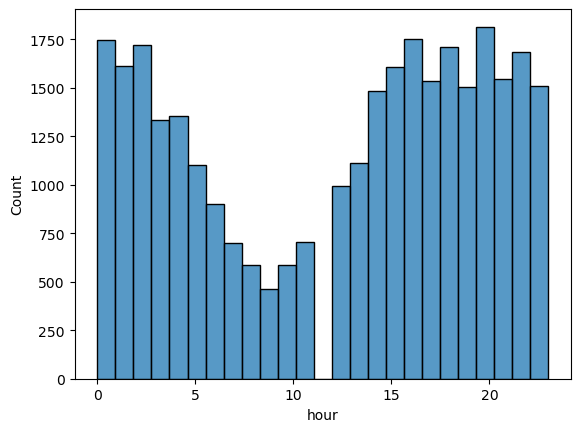

In [23]:
sns.histplot(df_new1["hour"])

 the people who are spending their Time before 5 am are more enrolled and those people who are spending their time after 15 hours are more enrolled  
 

<AxesSubplot:xlabel='dayofweek', ylabel='Count'>

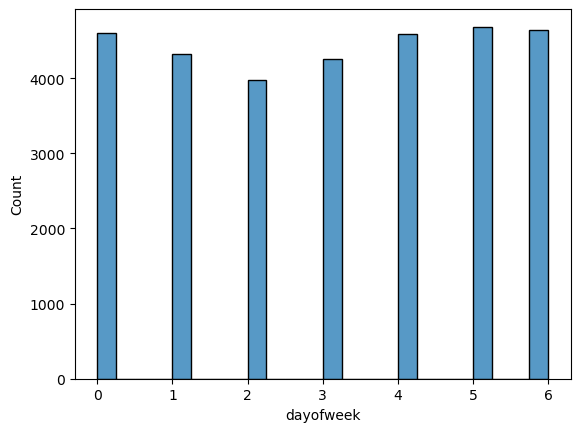

In [24]:
# 0:sunday 
sns.histplot(df_new1["dayofweek"])

 thrusday,friday ,sat,and sunday has high rate of enrollment so we can people are more spendind time in these four days

<AxesSubplot:xlabel='numscreens', ylabel='Count'>

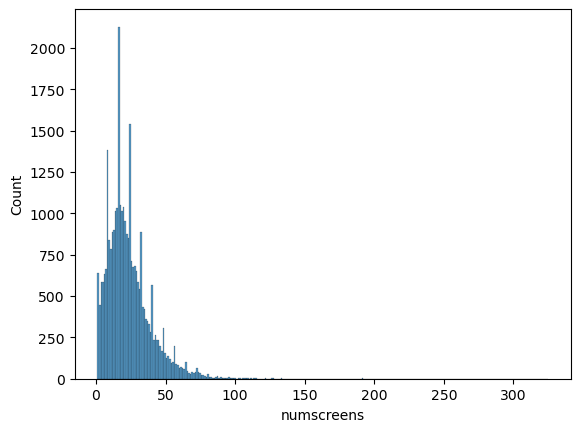

In [25]:
sns.histplot(df_new1["numscreens"])

 when the numscreens are between 20-40 the enrolled of the people are very high 

In [26]:
df_new1.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


In [27]:
# checking as minigame can effect the enrollement percentage 
x=df_new1.groupby("minigame")["enrolled"].count()
x

minigame
0    26929
1     4138
Name: enrolled, dtype: int64

<AxesSubplot:xlabel='minigame'>

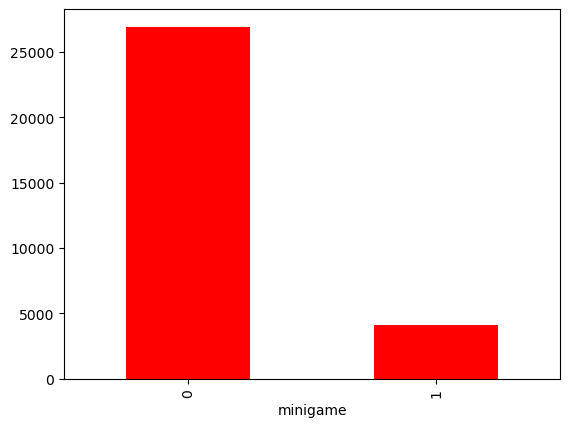

In [28]:
#plot of the minigame 
x.plot(kind="bar",color="r")

the people who do not play minigame are more enrolled as compare to those who play mini game this means people only play 
enjoyment 

In [29]:
# seeing the effect of preimum_feature on the enroolment rate 
y=df_new1.groupby("used_premium_feature")["enrolled"].count()
y

used_premium_feature
0    26205
1     4862
Name: enrolled, dtype: int64

<AxesSubplot:xlabel='used_premium_feature'>

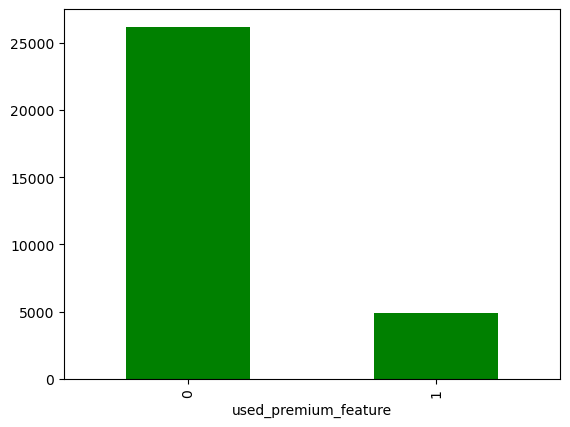

In [30]:
y.plot(kind='bar',color='g')

the people who dont usepremium _feature are more used bnpl because they dont have more money as compare to those who have more money 

In [31]:
# for the the enrolled==0 
p=df_new0.groupby("used_premium_feature")["enrolled"].count()
p

used_premium_feature
0    15183
1     3735
Name: enrolled, dtype: int64

In [32]:
z=df_new1.groupby("liked")["enrolled"].count()
z

liked
0    26003
1     5064
Name: enrolled, dtype: int64

<AxesSubplot:xlabel='liked'>

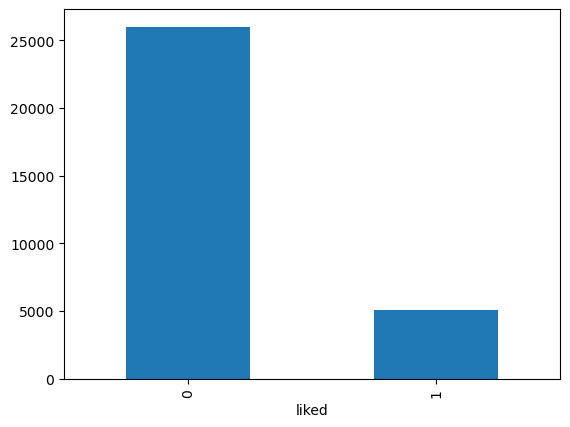

In [33]:
z.plot(kind="bar")

In [34]:
#for i in df1.columns:
 # sns.boxplot(x="enrolled", y=i, hue="enrolled", data=df1)
 # plt.show()

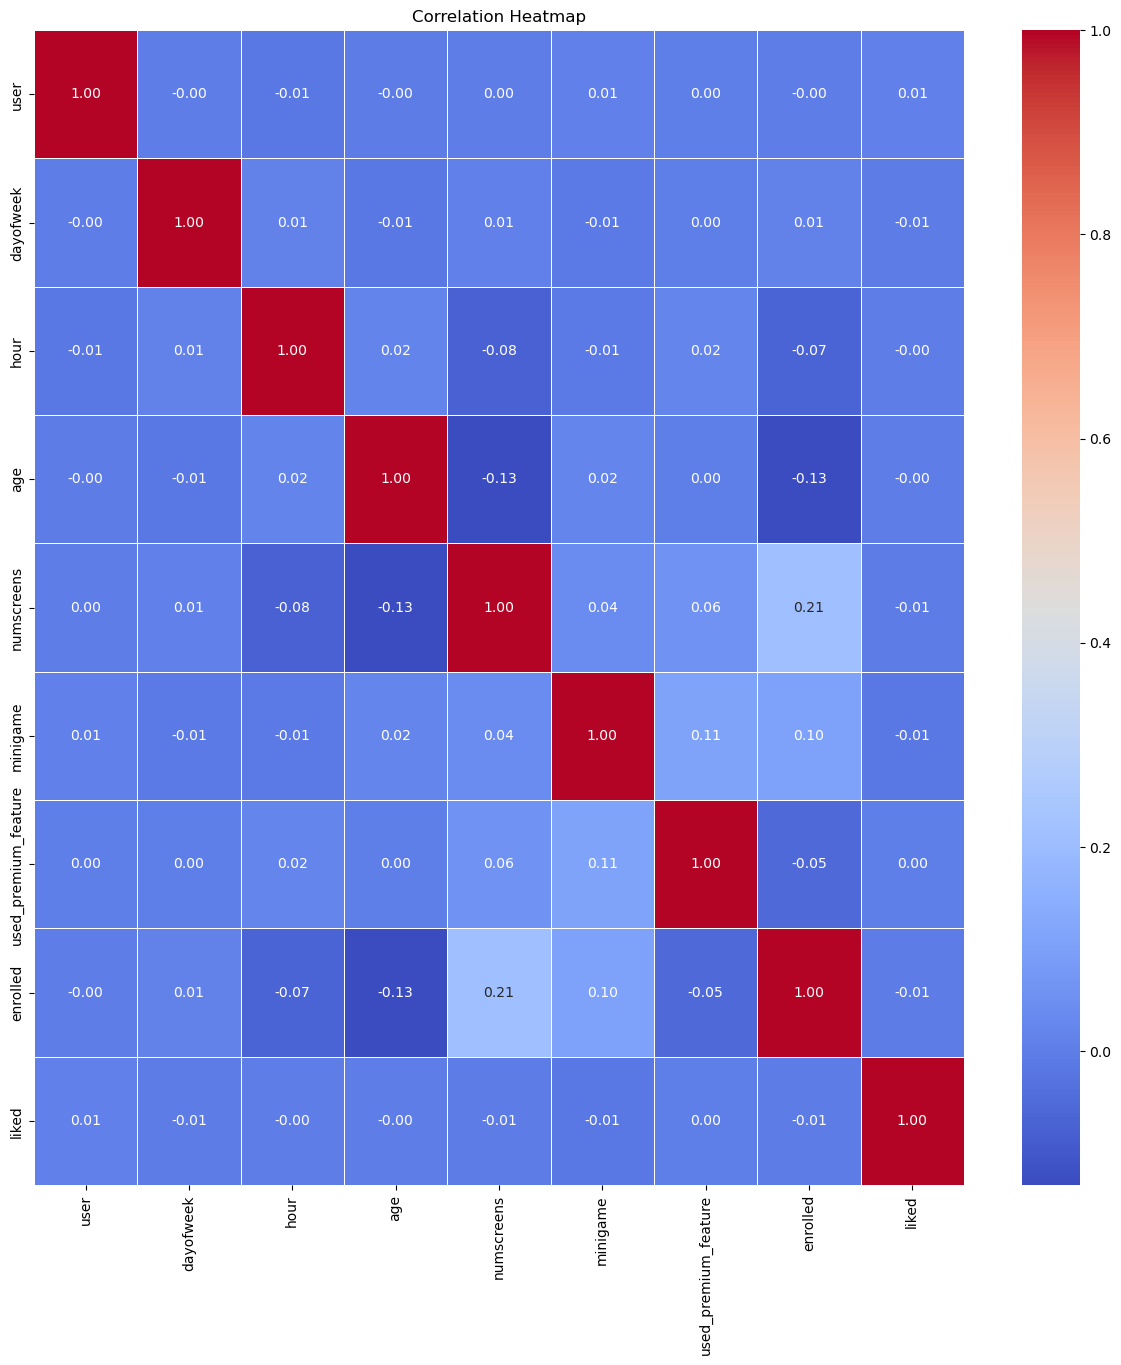

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))

# Create the heatmap using seaborn.
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=ax)

# Set the title of the heatmap.
ax.set_title("Correlation Heatmap")

# Show the plot.
plt.show()

it is clearly visible there is corrrelation between the the column of the dataframe since the threhold value is .90 so there is no multicollinarity between the columns 

In [36]:
df=pd.read_csv("mobileusebasedata_engineered.csv")

In [37]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [38]:
x=df.drop('enrolled',axis=1)
y=df["enrolled"]

In [39]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.01)
var_thr.fit(x)
var_thr.get_support()

low_var = [column for column in x.columns if column not in x.columns[var_thr.get_support()]]
print(low_var)

['ProfileChildren ', 'NetworkFailure', 'ListPicker']


In [40]:
x.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1


In [41]:
x.dtypes

user                       int64
dayofweek                  int64
hour                       int64
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
liked                      int64
location                   int64
Institutions               int64
VerifyPhone                int64
BankVerification           int64
VerifyDateOfBirth          int64
ProfilePage                int64
VerifyCountry              int64
Cycle                      int64
idscreen                   int64
Splash                     int64
RewardsContainer           int64
EditProfile                int64
Finances                   int64
Alerts                     int64
Leaderboard                int64
VerifyMobile               int64
VerifyHousing              int64
RewardDetail               int64
VerifyHousingAmount        int64
ProfileMaritalStatus       int64
ProfileChildren            int64
ProfileEducation           int64
ProfileEdu

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                    feature        VIF
0                      user   3.539115
1                 dayofweek   2.963819
2                      hour   3.398465
3                       age   5.747319
4                numscreens  12.868172
5                  minigame   1.170409
6      used_premium_feature   1.397994
7                     liked   1.189023
8                  location   5.336585
9              Institutions   2.207429
10              VerifyPhone   4.683804
11         BankVerification   2.164795
12        VerifyDateOfBirth   4.628577
13              ProfilePage   2.244536
14            VerifyCountry   4.708684
15                    Cycle   1.845900
16                 idscreen   1.846391
17                   Splash   1.425791
18         RewardsContainer   1.589783
19              EditProfile   1.736248
20                 Finances   1.440488
21                   Alerts   1.313717
22              Leaderboard   1.098140
23             VerifyMobile   1.313811
24            VerifyHousi

since vif value of the numscreens,VerifyHousingAmount,ProfileEducation,ProfileEducationMajor so we have to drop these column

since these are the constant column so we have to drop it 'ProfileChildren ', 'NetworkFailure', 'ListPicker'


In [43]:
x.drop(['ProfileChildren ', 'NetworkFailure', 'ListPicker', "numscreens","VerifyHousingAmount","ProfileEducation","ProfileEducationMajor"],axis=1,inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 42), (15000, 42), (35000,), (15000,))

In [47]:
x_train.drop("user",inplace=True,axis=1)

In [48]:
x_test.drop("user",inplace=True,axis=1)

In [49]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [50]:
lr=LogisticRegression()
fit=lr.fit(x_train_sc,y_train)
predict=lr.predict(x_test_sc)

In [51]:
predict

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [52]:
 from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7546
           1       0.77      0.77      0.77      7454

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



## Decision tree model 

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dl=DecisionTreeClassifier()
train=dl.fit(x_train_sc,y_train)
predict1=train.predict(x_test_sc)

In [56]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      7546
           1       0.70      0.69      0.70      7454

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



# svc

In [59]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_sc, y_train)

SVC(kernel='linear')

In [61]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(x_test_sc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


# AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
estimators=[125,150,175,200,250,300,350,400,450]
for i in range(len(estimators)):
   model = AdaBoostClassifier(n_estimators=estimators[i],learning_rate=0.1)
   model.fit(x_train_sc,y_train)
   ada_pred=model.predict(x_test_sc)
   print("Number of Estimator Used is:",estimators[i])
   print(classification_report(y_test, ada_pred))

Number of Estimator Used is: 125
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      7546
           1       0.74      0.77      0.76      7454

    accuracy                           0.75     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.75      0.75      0.75     15000

Number of Estimator Used is: 150
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7546
           1       0.75      0.77      0.76      7454

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Number of Estimator Used is: 175
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7546
           1       0.75      0.77      0.76      7454

    accuracy                           0.76     15000
   macro avg       0.76      

In [65]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train_sc, y_train)
y_pred_xgb = xgb_model.predict(x_test_sc)

acc=accuracy_score(y_test, y_pred_xgb)
acc

0.7849333333333334

# For pca  i make  a new dataframe and then apply all the modles

In [66]:
from sklearn.decomposition import PCA

In [67]:
data1=df.copy()

In [68]:
data1.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [69]:
data1.drop("user",inplace=True,axis=1)

In [70]:
data1.drop(['ProfileChildren ', 'NetworkFailure', 'ListPicker'],axis=1,inplace=True)

In [71]:
data1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,Other,SavingCount,CMCount,CCCount,LoansCount
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,6,1,24,13,0,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,16,28,40,0,0,1,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,1,18,31,32,0,0,1,1,0,1,...,0,0,0,0,0,10,0,2,0,1


In [72]:
y_pca=data1["enrolled"]
x_pca=data1.drop("enrolled",axis=1)

In [73]:
x_pca

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,Other,SavingCount,CMCount,CCCount,LoansCount
0,3,2,23,15,0,0,0,0,0,1,...,0,0,0,0,0,7,0,0,0,1
1,6,1,24,13,0,0,0,1,1,1,...,0,0,0,0,0,5,0,0,0,1
2,1,19,23,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,16,28,40,0,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,1,18,31,32,0,0,1,0,1,1,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0,0,0,1,...,0,1,0,0,0,6,0,2,0,0
49996,1,0,35,4,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,2,22,39,25,0,0,0,1,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,6,12,27,26,0,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [74]:
sc=StandardScaler()
data_sc=sc.fit_transform(x_pca)


In [75]:
data_sc

array([[-0.01469505, -1.41936322, -0.80757165, ..., -0.76202179,
        -0.28861861,  0.31234541],
       [ 1.4617    , -1.55380801, -0.7150065 , ..., -0.76202179,
        -0.28861861,  0.31234541],
       [-0.99895842,  0.8661982 , -0.80757165, ..., -0.76202179,
        -0.28861861,  0.31234541],
       ...,
       [-0.50682673,  1.26953257,  0.67347067, ..., -0.76202179,
        -0.28861861, -1.16376713],
       [ 1.4617    , -0.07491533, -0.43731107, ..., -0.76202179,
        -0.28861861, -1.16376713],
       [ 0.47743663, -1.55380801, -0.62244136, ..., -0.76202179,
        -0.28861861,  0.31234541]])

In [76]:
principal=PCA(0.95)
principal.fit(data_sc)
x=principal.transform(data_sc)

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y_pca,test_size=0.2,random_state=0)

In [78]:
lr=LogisticRegression()

In [79]:
fit=lr.fit(X_train,Y_train)

In [80]:
pred=lr.predict(X_test)

In [81]:
acc1=accuracy_score(pred,Y_test)
acc1

0.7552

In [82]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5072
           1       0.74      0.77      0.76      4928

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [83]:
X_train.shape,Y_train.shape

((40000, 35), (40000,))

In [85]:
estimators=[125,150,175,200,250,300,350,400]
for i in range(len(estimators)):
   model = AdaBoostClassifier(n_estimators=estimators[i],learning_rate=0.1)
   model.fit(X_train,Y_train)
   ada_pred=model.predict(X_test)
   print("Number of Estimator Used is:",estimators[i])
   print(classification_report(Y_test, ada_pred))

Number of Estimator Used is: 125
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      5072
           1       0.72      0.76      0.74      4928

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Number of Estimator Used is: 150
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5072
           1       0.73      0.77      0.75      4928

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Number of Estimator Used is: 175
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5072
           1       0.73      0.77      0.75      4928

    accuracy                           0.74     10000
   macro avg       0.75      

## aplly grid search cv on logistic regression

In [86]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for L1, 'l2' for L2)
}

In [87]:
x_train_sc,x_test_sc

(array([[-0.01696271, -1.42335224, -0.4378864 , ...,  1.69727723,
         -0.288819  ,  0.30979849],
        [-1.00234832,  0.32672618, -1.08235147, ...,  0.05757691,
         -0.288819  ,  0.30979849],
        [-1.00234832,  0.59596901, -0.06962064, ...,  0.05757691,
         -0.288819  ,  0.30979849],
        ...,
        [-0.01696271, -0.88486657, -0.62201927, ..., -0.76227325,
         -0.288819  , -1.16563315],
        [ 0.4757301 ,  0.05748334, -0.4378864 , ..., -0.76227325,
         -0.288819  , -1.16563315],
        [-1.00234832,  0.73059043, -1.08235147, ..., -0.76227325,
         -0.288819  ,  0.30979849]]),
 array([[-1.48194236, -1.54416769,  0.87668994, ..., -0.76144965,
         -0.28816929, -1.15943346],
        [ 0.97225472, -0.87397929, -0.52977454, ..., -0.76144965,
         -0.28816929,  0.31830483],
        [-1.48194236,  0.33235983,  0.50163275, ...,  0.0634633 ,
         -0.28816929,  1.79604311],
        ...,
        [-0.99110295, -1.14205465,  0.31410415, ...,  

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_sc, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [89]:
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)


In [90]:
y_pred = best_model.predict(x_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Test Accuracy: 77.03%


## hypermetertuning for adaboost 

In [91]:
param_grid = {
    'n_estimators': [50, 100, 350],                # Number of weak learners (estimators)
    'learning_rate': [0.1, 0.5, 1.0],              # Learning rate (step size at each iteration)
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  # Base estimator (weak learner)
}

In [92]:
adaboost_model = AdaBoostClassifier()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_sc, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 350]},
             scoring='accuracy')

In [93]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 100}
Test Accuracy: 78.38%


0.7767428755760193
0.777400016784668
0.6636571288108826
0.6671333312988281
0.776371419429779
0.7761333584785461


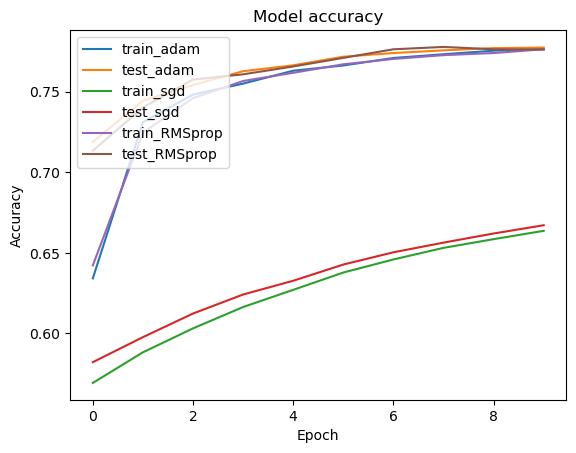

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a function to create the model
def create_model(optimizer='adam'):
    # Initialize the constructor
    model = Sequential()
    # Add an input layer
    model.add(Dense(50, activation='relu', input_shape=(n_features,)))
    # Add hidden layer
    model.add(Dense(30, activation='relu'))
    # Add an output layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


# Number of features for the input layer
n_features = x_train_sc.shape[1]

# Create models with different optimizers
optimizers = ['adam', 'sgd', 'RMSprop']
histories = []

for opt in optimizers:
    model = create_model(opt)
    history = model.fit(x_train_sc, y_train, epochs=10, batch_size=2000, verbose=0, validation_data=(x_test_sc, y_test))
    histories.append(history)

# Plot the accuracy for the models
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label='train_'+optimizers[i])
    plt.plot(history.history['val_accuracy'], label='test_'+optimizers[i])
   
    train_accuracy = history.history['accuracy'][-1]
    print("{}"train_accuracy)
    test_accuracy = history.history['val_accuracy'][-1]
    print(test_accuracy)

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [99]:
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Define a function to create a model
def create_model(optimizer='adam'):
    # Initialize the constructor
    model = Sequential()
    # We're using a sequential model, which is a linear stack of layers. It's the simplest kind of model, 
    # appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
    
    # Add an input layer 
    model.add(Dense(50, activation='relu', input_shape=(n_features,)))
    # Here we're adding the first hidden layer and specifying the input shape which is the number of features in our data. 
    # We're using 50 nodes and the 'relu' activation function.
    
    # Add hidden layer
    model.add(Dense(30, activation='relu'))
    # We're adding a second layer (hidden layer) to our model. This has 30 nodes and also uses the 'relu' activation function.

    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    # We're adding the output layer to our model. Because we're doing binary classification (user will either enroll or not),
    # we only need one node in the output layer. We use a 'sigmoid' activation function to ensure our network output is between 0 and 1 and can be interpreted as a probability.
    
    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    # Here we're compiling the model. Compiling the model takes two arguments: an optimizer and a loss function. We also include 'accuracy' in the metrics to track during training.
    
    return model

# Number of features for the input layer
n_features = x_train_sc.shape[1]
# This gets the number of features in our dataset, which is needed to define the input shape for our model.

# Create models with different optimizers
optimizers = ['adam', 'sgd', 'RMSprop']
# These are the optimizers we will use to train different models and compare their performance.

histories = []
# We create an empty list to store the history of each model. The history will include the loss and accuracy of the model for each epoch.

results = []
# We create another empty list to store the final accuracy of each model.

for opt in optimizers:
    model = create_model(opt)
    #Here we call the create_model function to create a model with the current optimizer.
    
    history = model.fit(x_train_sc, y_train, epochs=10, batch_size=2000, verbose=0, validation_data=(x_test_sc, y_test))
    # We fit the model to our training data, with validation on our test set. We use a batch size of 50 and train for 100 epochs.
    
    histories.append(history)
    # We append the model's history to the histories list.
    results.append({
        'optimizer': opt,
        'final_training_accuracy': history.history['accuracy'][-1],
        'final_validation_accuracy': history.history['val_accuracy'][-1]
    })# This appends a dictionary containing the optimizer used and the final training and validation accuracies to the results list.

results_df = pd.DataFrame(results)
# We convert the results list to a DataFrame for easier viewing and manipulation.


In [100]:
results_df

,optimizer,final_training_accuracy,final_validation_accuracy
0,adam,0.777057,0.776067
1,sgd,0.669829,0.666400
2,RMSprop,0.776971,0.777933


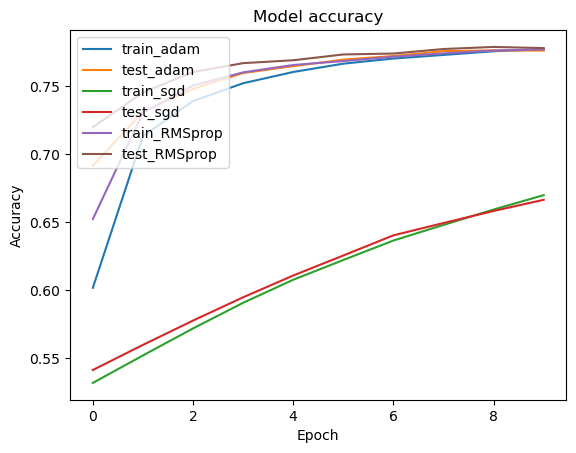

In [101]:
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label='train_'+optimizers[i])
    plt.plot(history.history['val_accuracy'], label='test_'+optimizers[i])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()